<a href="https://colab.research.google.com/github/hhijo/hhijo/blob/main/Copy_of_Unsupervised_Machine_Learning_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unsupervised Machine Learning Algorithms

**Specific Learning Outcomes**

By the end of the course the student should be able to:

Pre-process data for unsupervised learning.

Apply at least one unsupervised machine-learning model.







# **Unsupervised Machine Learning**

***Useful where labeled data is not available***

Unsupervised machine learning refers to a type of machine learning that deals with identifying patterns in data without reference to known, or labeled, outcomes. Unlike supervised learning, where models are trained using labeled data, unsupervised learning works with datasets that do not have historical labels. This means the model tries to infer the structure from the input data without any explicit guidance on what is correct or incorrect.

***Explanation of Unsupervised Learning and How It Differs from Supervised Learning***

Unsupervised learning differs from supervised learning in that it does not rely on output labels. Supervised learning uses a training set to teach models to yield the desired output, whether it’s a categorical label (classification) or a continuous output (regression). Unsupervised learning, however, focuses on finding relationships and patterns in the data. Key objectives include dimensionality reduction, clustering, and association rule mining.

**Definition:** Unsupervised learning involves the process of grouping objects into meaningful and useful clusters such that objects within a cluster are homogeneous (high intra-class similarity) but the same objects are heterogeneous (low inter-class similarity; high inter-class dissimilarity) to those in other clusters.

**Goal/principle:** Minimize intragroup variability & maximize intergroup variability using some similarity/dissimilarity metric

**Examples of Unsupervised Learning**

Customer Segmentation: Grouping customers based on purchasing behavior.

Anomaly Detection: Identifying unusual patterns that do not conform to expected behavior.

Market Basket Analysis: Discovering associations and relationships between different items purchased together.



**Types of Unsupervised Learning**

***Clustering***

Clustering involves grouping a set of objects in such a way that objects in the same group (a cluster) are more similar to each other than to those in other groups. Examples include:

*   K-means Clustering: Groups data into k number of clusters.
*   K-means Clustering: Groups data into k number of clusters.




***Association***

Association rule mining is a technique for discovering interesting relations between variables in large databases. It’s used to identify items that frequently co-occur in transactions.

Cluster analysis involves all or some of the following;

1 Factor Analysis: reducing the dimensionality of data (Note: clustering algorithms cannot differentiate between relevant/useful and irrelevant data)

2 Clustering: creating clusters within data

3 Discriminant Analysis: Assessment of how well data properties are captured

Other similar methods for identifying and creating groups/clusters:

Q-analysis, multi-dimensional scaling (MDS), latent class analysis (LCA)

**Applications of clustering**

Marketing: identifying market segments, distinct groups of customers/clientele - their common characteristics e.g. demographics. Design of features for creating targeted marketing campaigns

Insurance: groups having highest average claim costs

Seismology: Earthquake epicenters cluster around continental fault lines; clustering identify faults with higer magnitude probability than others

Government planning: Group households based on multiple attributes e.g. income, size, type & identify specific households for social schemes

Taxonomy: Create taxonomy trees of groups and subgroups of similar species

# Unsupervised Machine Learning Algorithms: K-means Algorithm

K-means Clustering is one of the simplest and most commonly used clustering algorithms. It aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean.

**Principles of K-means Clustering**

Cluster Centroids: The center of each cluster is computed as the mean of all points belonging to the cluster.

Assignment and Update: Iteratively assign points to the nearest cluster and update the centroids.

**How K-means Works**

Initialize centroids randomly.

Assign each point to the nearest centroid.

Recompute centroids based on the points assigned to each cluster.

Repeat steps 2 and 3 until convergence or until the end of a fixed number of iterations.



# Sample Dataset -   Child Heath dataset

**Importing necessary libraries and set up**

In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import warnings

warnings.filterwarnings('ignore')


**Reading the dataset and viewing the first few rows**

In [2]:
df = pd.read_csv('/content/childhealthdata.csv')
df.head()

,Child participated in POLIO campaign August 2013,diarrhea_status,weight,height,residence,Sex,age,age_category,education,wealth_index
0,1,No,16.2,102.4,Rural,Female,45,36-47,Secondary+,Richest
1,1,No,13.5,92.5,Rural,Male,45,36-47,Primary,Second
2,1,No,13.4,88.5,Rural,Male,36,36-47,Primary,Fourth
3,1,No,15.0,101.3,Rural,Female,51,48-59,Primary,Fourth
4,1,No,15.2,105.0,Rural,Female,56,48-59,Primary,Fourth


 **Summary of the DataFrame. It provides essential information about the data.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Child participated in POLIO campaign August 2013  799 non-null    int64  
 1    diarrhea_status                                  799 non-null    object 
 2   weight                                            799 non-null    float64
 3   height                                            799 non-null    float64
 4   residence                                         799 non-null    object 
 5   Sex                                               799 non-null    object 
 6   age                                               799 non-null    int64  
 7   age_category                                      799 non-null    object 
 8   education                                         768 non-null    object 
 9   wealth_index         

**Pairplot with Seaborn**


*    A pairplot is used to visualize pairwise relationships in a dataset. It creates a grid of plots for each pair of variables, which helps in exploring relationships and identifying patterns.

**Key Parameters:**

*'df':* The DataFrame containing the data to be plotted.

*'hue':* The variable that defines subsets of the data, using different colors. Here, '**Sex**' is used to differentiate data points based on gender.

*'aspect':* Controls the aspect ratio of each plot. Setting it to 1.5 makes each subplot wider, improving readability.



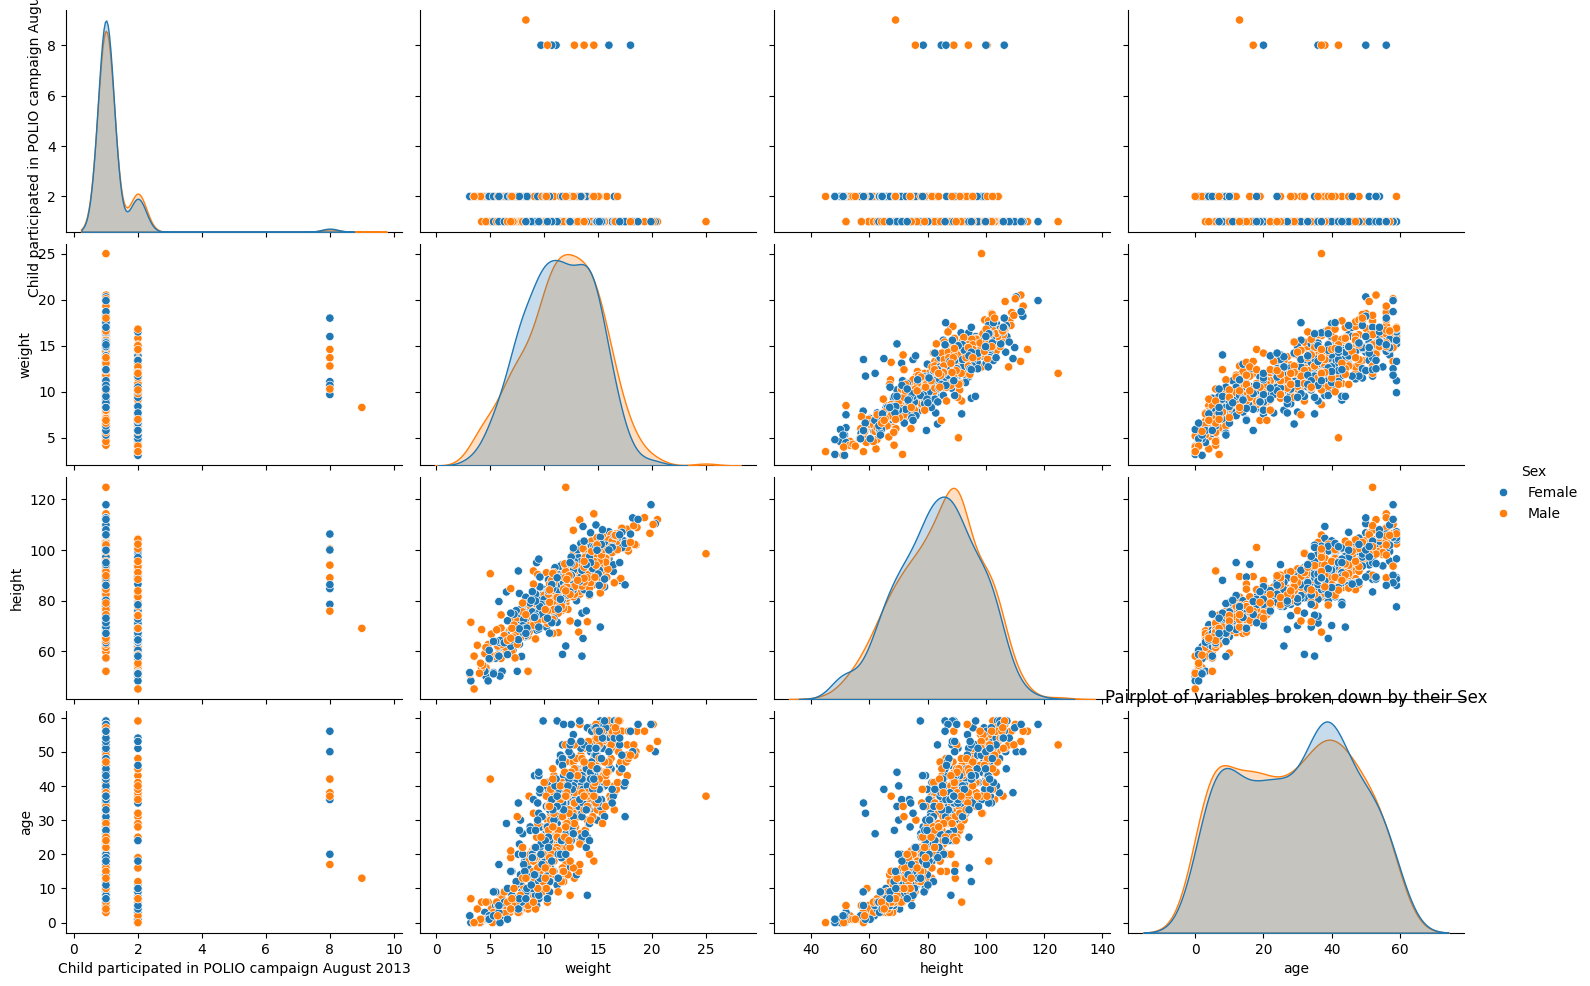

In [4]:
# Generate the pairplot with 'Sex' as the hue
sns.pairplot(df, hue='Sex', aspect=1.5)

# Add a title to the plot
plt.title('Pairplot of variables broken down by their Sex')
# Show the plot
plt.show()

**Data preprocessing**

We are standardizing numerical columns and one-hot encoding categorical columns using a **'ColumnTransformer'**. This prepares the data for clustering with KMeans, ensuring that numerical and categorical data are appropriately handled.

**'ColumnTransformer'** Allows different columns or column subsets to be transformed in different ways before applying the final estimator


In [5]:
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Define categorical and numerical columns
categorical_cols = ['diarrhea_status', 'residence', 'Sex', 'age_category', 'education', 'wealth_index']
numerical_cols = ['Child participated in POLIO campaign August 2013', 'weight', 'height', 'age']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standard scaling for numerical columns
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encoding for categorical columns
    ]
)


We then create a pipeline that incorporates the preprocessing steps (standardization and one-hot encoding) defined earlier. This ensures that the data is preprocessed consistently before any subsequent machine learning operations, such as clustering.

In [6]:
#remove any leading or trailing whitespace from the column names in the DataFrame, hence preventing errors
df.columns = df.columns.str.strip()


In [7]:
# Create a pipeline with preprocessing
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


We then fit the Pipeline to the dataset, transforming the data using the specified preprocessing steps. It then initializes a range of cluster numbers to test and prepares an empty list to store Within-Cluster Sum of Squares (WCSS) values for evaluating clustering performance.

In [8]:
# Fit the pipeline to the data and transform it
df_processed = pipeline.fit_transform(df)

# Define the range of clusters to test
cluster_range = range(1, 11)  # Testing from 1 to 10 clusters

# List to store WCSS values
wcss = []

**KMeans Clustering**

K-means clustering is a popular unsupervised machine learning algorithm that partitions a dataset into K distinct, non-overlapping clusters. It assigns each data point to the nearest cluster while keeping the centroids as small as possible. The process involves selecting K initial centroids, then iteratively assigning each data point to the nearest centroid based on the Euclidean distance and recalculating the centroid of each cluster until the positions of the centroids stabilize or a maximum number of iterations is reached.

**Examples in Public Health:**

*Epidemiological Studies:* K-means can be used to cluster populations based on health characteristics such as age, lifestyle factors, and prevalence of certain symptoms to identify patterns in health conditions. This can help in understanding how different health conditions might cluster geographically or demographically.

*Resource Optimization:* Health facilities can use K-means to cluster patient visits by symptoms and demographics to optimize resource allocation. For example, similar cases can be grouped to streamline treatment processes or manage resource distribution in clinics and hospitals effectively.

*Health Campaign Targeting:* Public health officials might use K-means to segment the population based on health behaviors, such as smoking, exercise frequency, or diet, to tailor health campaigns more effectively. By clustering groups with similar behaviors, officials can create targeted interventions that are more likely to resonate with each group’s behaviors and needs.

**Implementing K-means Clustering**

Pre-process Data for Clustering

Feature Scaling: Standardize or normalize data to ensure equal importance is given to each feature.

Handling Missing Values: Impute or remove missing values to avoid biased or incorrect clustering.

**Evaluating K-means Clustering**

Inertia: Sum of squared distances of samples to their closest cluster center.

Silhouette Score: Measure of how well an object has been classified.

**Limitations of K-means and How to Address Them**

Sensitivity to Outliers: K-means can be significantly influenced by outliers. Solutions include cleaning data before clustering or using robust clustering algorithms.

Dependence on Initial Selection of Centroids: Multiple runs with different initial centroids can provide better outcomes.

**k-means goal:**

k-means goal: divide m points in n-dimensions to k clusters such that the within-cluster sum (WCSS) of squares is minimized

K-means/k-medians

k-means algorithm: 1 Assignment: Assign each observation to the cluster that yields the minimum WCSS 2 Update: Update centroid - recompute mean of observations in cluster

**Methods to Determine the Optimal Number of Clusters**

Elbow Method: Plot the sum of squared distances from points to their assigned cluster centers and find the “elbow.”

Silhouette Score: Measures how similar an object is to its own cluster compared to other clusters.










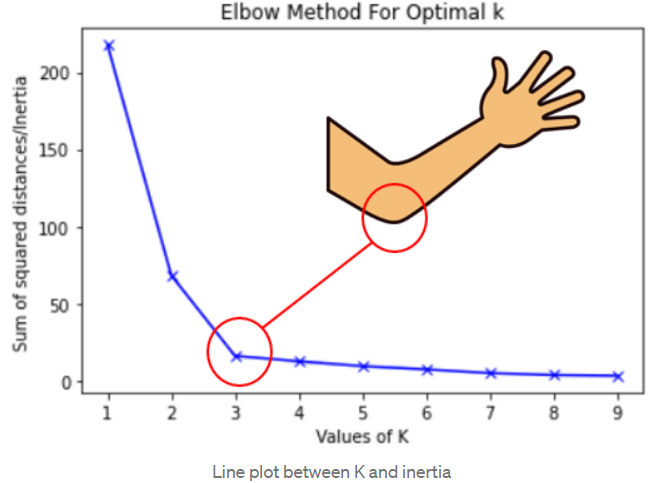

The Elbow Curve to visually identify the optimal number of clusters by showing the relationship between the number of clusters and WCSS.

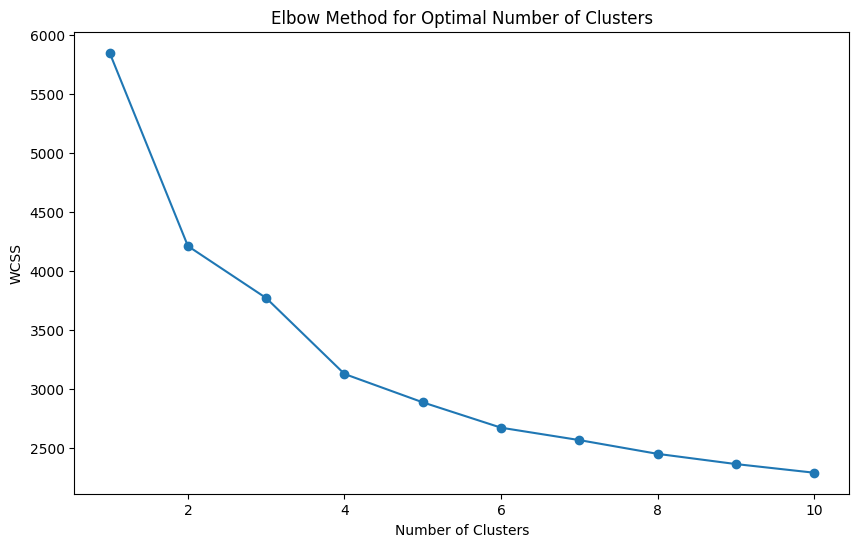

In [9]:
# Loop over the range of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_processed)  # Fit KMeans to the preprocessed data
    wcss.append(kmeans.inertia_)  # WCSS is the inertia_ attribute

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [10]:
# Fit KMeans with the optimal number of clusters (example with 3 clusters)
optimal_clusters = 3  # You can choose the optimal number based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_processed)  # Add cluster labels to the original DataFrame

# Show the first few rows of the DataFrame with cluster labels
print(df.head())

   Child participated in POLIO campaign August 2013 diarrhea_status  weight  \
0                                                 1              No    16.2   
1                                                 1              No    13.5   
2                                                 1              No    13.4   
3                                                 1              No    15.0   
4                                                 1              No    15.2   

   height residence     Sex  age age_category   education wealth_index  \
0   102.4     Rural  Female   45        36-47  Secondary+      Richest   
1    92.5     Rural    Male   45        36-47     Primary       Second   
2    88.5     Rural    Male   36        36-47     Primary       Fourth   
3   101.3     Rural  Female   51        48-59     Primary       Fourth   
4   105.0     Rural  Female   56        48-59     Primary       Fourth   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


Creating the Visual Plots

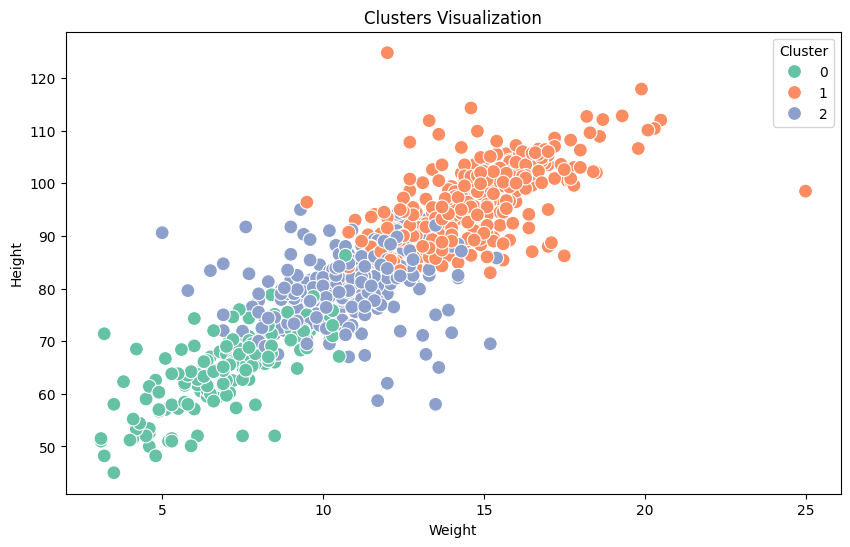

In [11]:
# Optionally, visualize clusters for selected features (e.g., 'weight' vs 'height')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['weight'], y=df['height'], hue=df['Cluster'], palette='Set2', s=100)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Clusters Visualization')
plt.legend(title='Cluster')
plt.show()

Also let's see them more clearly with swarmplot:

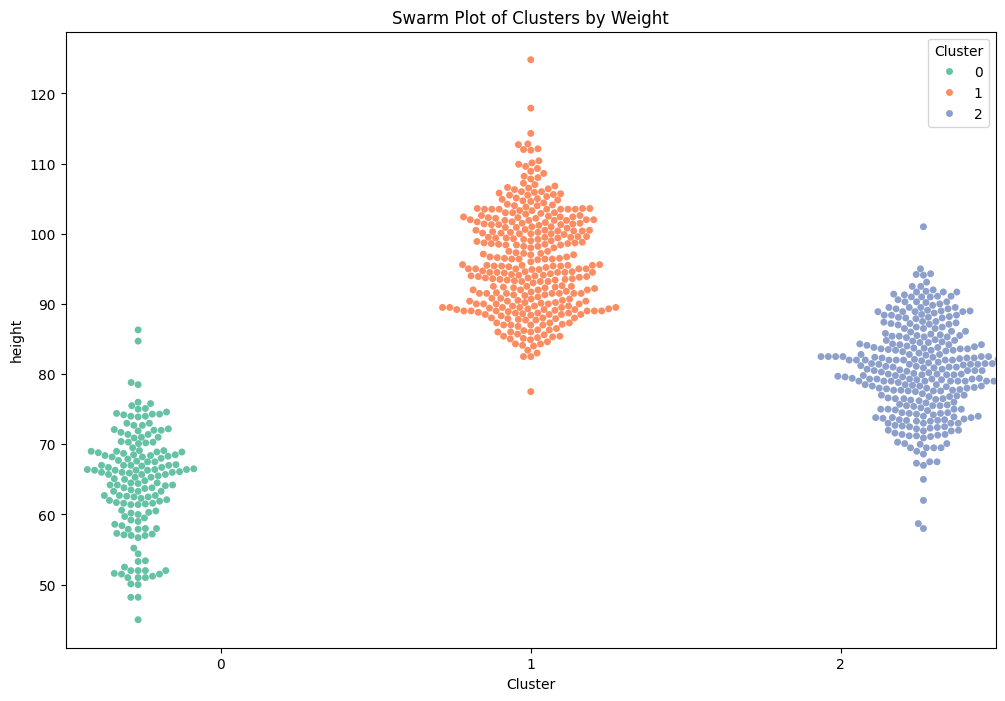

In [12]:
# Create a swarm plot to visualize clusters
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Cluster', y='height', data=df, palette='Set2', hue='Cluster', dodge=True)
plt.xlabel('Cluster')
plt.ylabel('height')
plt.title('Swarm Plot of Clusters by Weight')
plt.legend(title='Cluster')
plt.show()


We can clearly see our clusters as we indicated before.

**Hierarchical Clustering**

Hierarchical clustering is a method in unsupervised machine learning that builds a hierarchy of clusters by either a divisive method (splitting) or an agglomerative method (merging). In the agglomerative approach, which is more common, each data point starts as its own cluster, and pairs of clusters are merged as one moves up the hierarchy. This process continues until all points are merged into a single cluster, or until a stopping criterion is reached.

The result is often represented as a dendrogram—a tree-like diagram that records the sequences of merges or splits. This visualization helps in understanding the data structure and deciding the number of clusters by cutting the dendrogram at a desired level.

**Examples in Public Health:**

*Disease Outbreak Investigation:* Hierarchical clustering can be used to analyze genetic data from pathogens to determine the relationships between different strains of a virus or bacteria. This can help trace the source and spread of infection in an outbreak.

*Healthcare Resource Allocation*: Clustering different regions based on health metrics such as disease prevalence, vaccination rates, or healthcare access can aid in effectively allocating healthcare resources. For example, regions clustered together with high disease prevalence but low healthcare access can be prioritized for resource allocation.

*Patient Stratification:* In chronic disease management, patients can be clustered based on various health indicators like symptoms, comorbidities, or treatment responses. This helps in identifying patient subgroups that may benefit from tailored treatment protocols or specialized care management strategies.

Hierarchical clustering in public health can thus reveal natural groupings and relationships within complex health data, guiding public health decisions and strategies by identifying clusters of similar instances in the data.



**Agglomerative**

We will be looking at a clustering technique, which is Agglomerative Hierarchical Clustering. Agglomerative is the bottom up approach which is more popular than Divisive clustering.

We will also be using Complete Linkage as the Linkage Criteria.

The Agglomerative Clustering class will require two inputs:

n_clusters: The number of clusters to form as well as the number of centroids to generate.
linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
Value will be: 'complete'
Note: It is recommended that try everything with 'average' as well

In [24]:
# Assuming 'df' is your preprocessed DataFrame
# ... (Your preprocessing steps here)

In [27]:
# Assuming 'df' is your preprocessed DataFrame
# ... (Your preprocessing steps here)

# Identify columns with non-numerical data
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Handle non-numerical columns (example using one-hot encoding)
df_encoded = pd.get_dummies(df, columns=non_numeric_cols)

kmeans = KMeans(n_clusters=3)  # Replace 3 with your optimal k
kmeans.fit(df_encoded)  # Fit KMeans on the encoded DataFrame
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=df_encoded.columns)
centroids_df['Cluster'] = range(len(centroids))

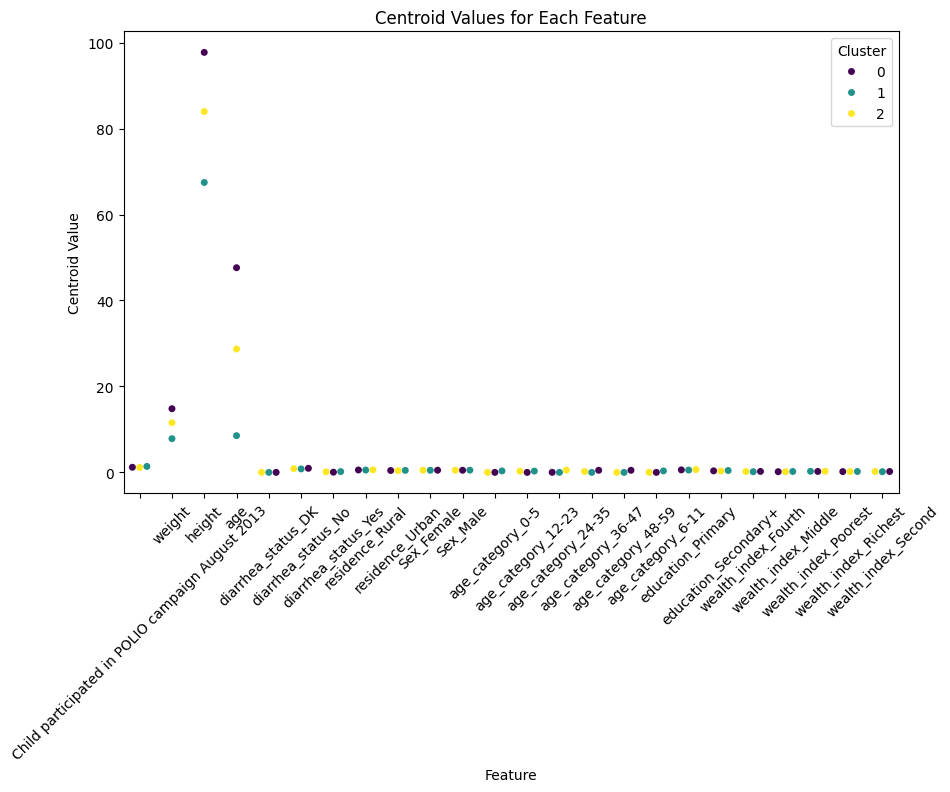

In [28]:
# Assuming 'df' is your preprocessed DataFrame
# ... (Your preprocessing steps here)

# Identify columns with non-numerical data
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Handle non-numerical columns (example using one-hot encoding)
df_encoded = pd.get_dummies(df, columns=non_numeric_cols)

kmeans = KMeans(n_clusters=3)  # Replace 3 with your optimal k
kmeans.fit(df_encoded)  # Fit KMeans on the encoded DataFrame
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=df_encoded.columns) # Define centroids_df here
centroids_df['Cluster'] = range(len(centroids))

centroids_melted = pd.melt(centroids_df, id_vars=['Cluster'], var_name='Feature', value_name='Centroid Value')
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Feature', y='Centroid Value', hue='Cluster', data=centroids_melted, palette='viridis')
plt.title('Centroid Values for Each Feature')
plt.xticks(rotation=45)
plt.show()

   Child participated in POLIO campaign August 2013 diarrhea_status  weight  \
0                                                 1              No    16.2   
1                                                 1              No    13.5   
2                                                 1              No    13.4   
3                                                 1              No    15.0   
4                                                 1              No    15.2   

   height residence     Sex  age age_category   education wealth_index  \
0   102.4     Rural  Female   45        36-47  Secondary+      Richest   
1    92.5     Rural    Male   45        36-47     Primary       Second   
2    88.5     Rural    Male   36        36-47     Primary       Fourth   
3   101.3     Rural  Female   51        48-59     Primary       Fourth   
4   105.0     Rural  Female   56        48-59     Primary       Fourth   

   Cluster  
0        7  
1        1  
2        1  
3        9  
4        9  


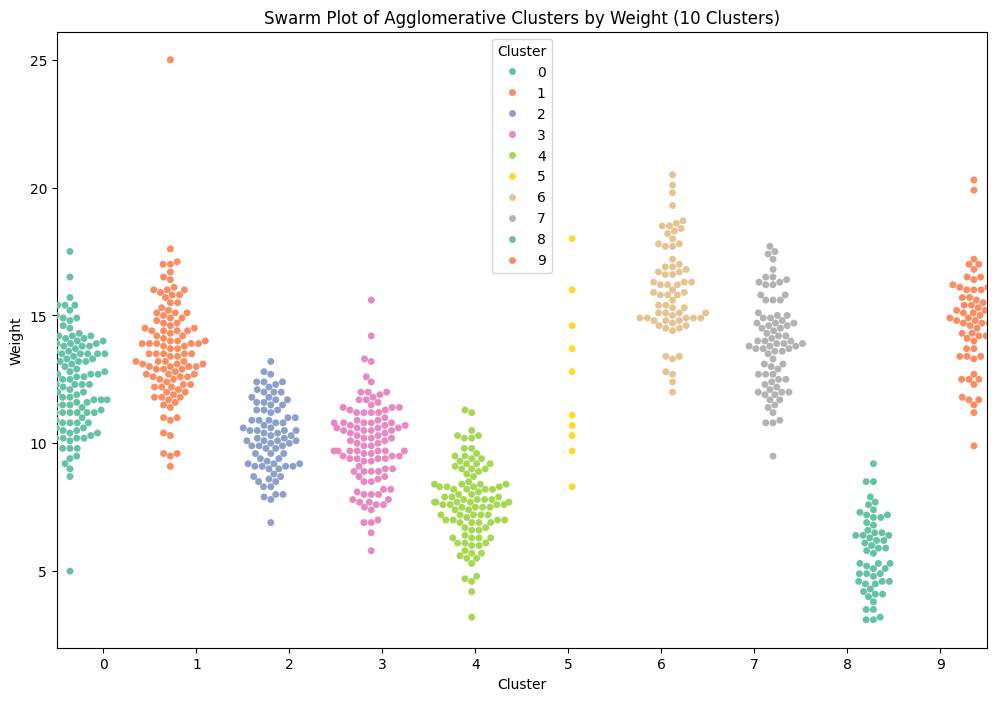

In [13]:
from sklearn.cluster import AgglomerativeClustering

# Define the number of clusters
#n_clusters = 5

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
df['Cluster'] = agg_clustering.fit_predict(df_processed)  # Add cluster labels to the original DataFrame

# Show the first few rows of the DataFrame with cluster labels
print(df.head())

# Create a swarm plot to visualize clusters
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Cluster', y='weight', data=df, palette='Set2', hue='Cluster', dodge=True)
plt.xlabel('Cluster')
plt.ylabel('Weight')
plt.title(f'Swarm Plot of Agglomerative Clusters by Weight ({n_clusters} Clusters)')
plt.legend(title='Cluster')
plt.show()


**Dendrograms**

Dendrograms are vital for visualizing the results of hierarchical clustering, showing how clusters form by illustrating the merging points of elements or groups. The y-axis typically represents the distance or dissimilarity measure, indicating the similarity between clusters. Analysts use dendrograms to determine the optimal number of clusters by identifying where to ‘cut’ the dendrogram, based on the length of the vertical lines that signify distances between merging clusters. This helps in understanding the underlying structure of the data and identifying natural divisions.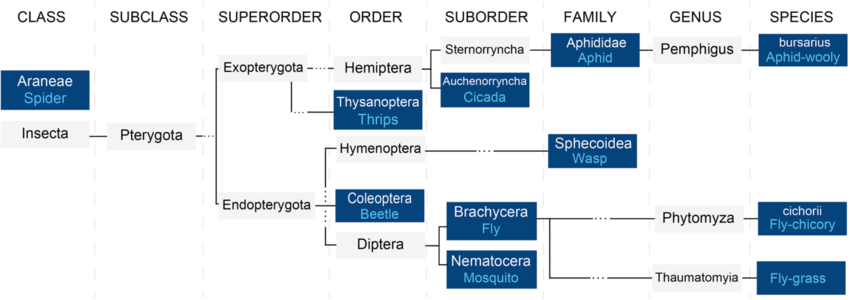

For example, in health care, providers might cluster patients based on risk factors like age, BMI, and cholesterol levels using hierarchical clustering. The dendrogram would then display how patients group together and the distances between these groups, indicating significant health profile differences. This helps in tailoring interventions and monitoring strategies to different patient clusters, and in identifying outliers or specific subgroups that require special attention. Dendrograms thus offer a clear and interpretable overview of data relationships, aiding strategic decision-making in various applications.

**Use of Dendrograms in Hierarchical Clustering**

Visualizing Cluster Formation:

Dendrograms show how each cluster is composed by illustrating the point at which individual elements or previously formed clusters merge together. The y-axis often represents a distance or dissimilarity measure, indicating how similar or dissimilar the clusters are.

Determining the Number of Clusters:

By examining the lengths of the vertical lines (which represent the distance or dissimilarity between clusters), analysts can decide where to ‘cut’ the dendrogram to define clusters. A longer vertical line suggests a larger distance between clusters being merged, indicating a good point for separation.

Understanding Data Structure:

Dendrograms provide insights into the data’s structure, showing which elements or clusters are closely related and which are more distinct. This is useful for identifying natural divisions in data.

**Examples of Dendrogram Use in Hierarchical Clustering**

Genetic Sequencing:

In biology, dendrograms are used to visualize the evolutionary relationships between different species or genes. By clustering genetic markers, scientists can infer evolutionary distances.

Customer Segmentation:

In marketing, companies use dendrograms to cluster customers based on purchasing behavior or preferences. This can help in tailoring marketing strategies to different customer groups.

Public Health Surveillance:

Dendrograms help in tracking the spread of diseases by clustering regions based on disease incidence rates. Public health officials can use these clusters to prioritize areas for interventions.

Example in Detail: Clustering Patients for Health Risk Assessment

Imagine a healthcare provider wants to cluster patients based on their health risk factors such as age, BMI, blood pressure, and cholesterol levels. Hierarchical clustering can be applied to group patients with similar health profiles. The resulting dendrogram would show how patients or patient groups are combined into larger clusters.

If the dendrogram shows a large distance between two major branches, it suggests a significant difference in health risk profiles between those patient groups. The healthcare provider might decide to apply different monitoring and intervention strategies based on these clusters.

By interpreting the dendrogram, the provider can also identify outliers or specific subgroups that may need special attention, guiding personalized healthcare plans.

Overall, dendrograms serve as a powerful tool in hierarchical clustering by providing a detailed and interpretable summary of how clusters are formed, aiding decision-making across various fields.

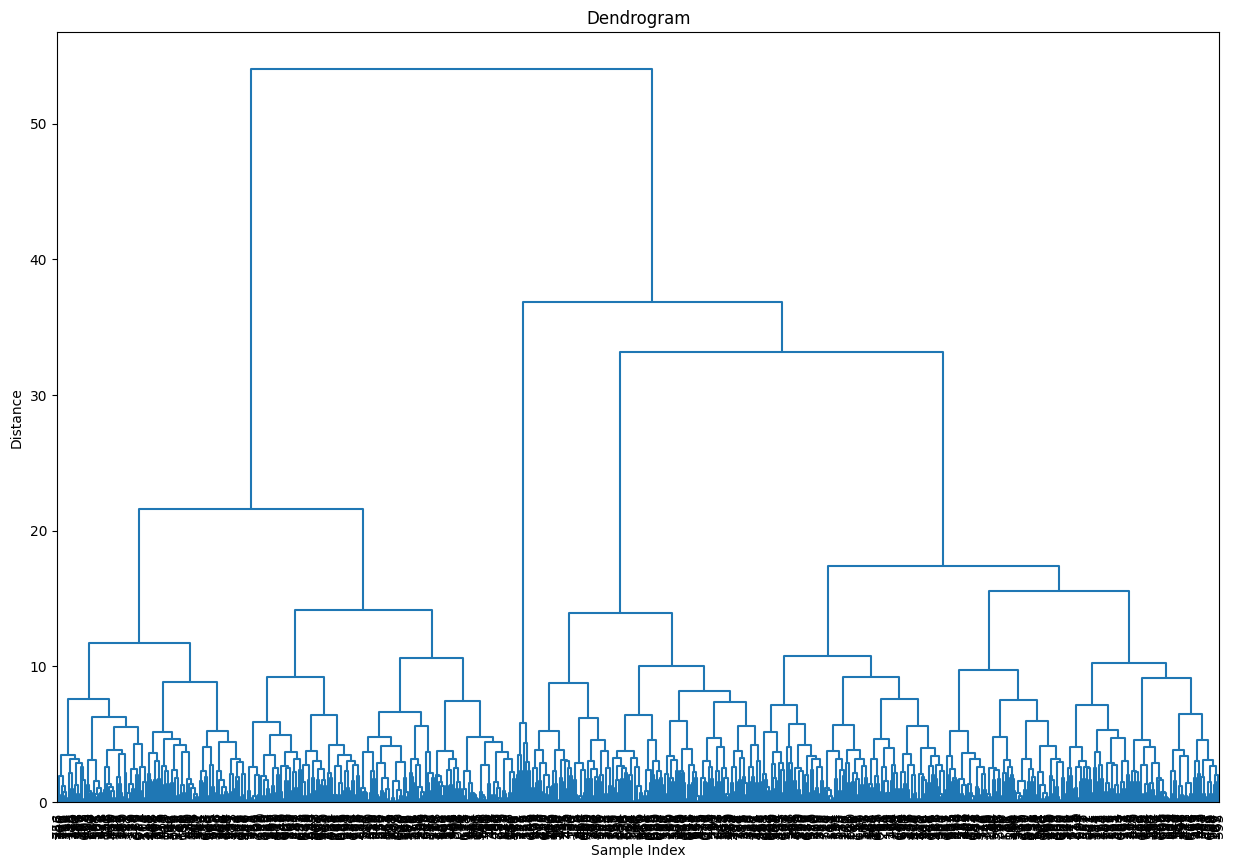

In [14]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
linkage_matrix = linkage(df_processed, method='ward')

# Create the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix,
           labels=df.index.tolist(),
           leaf_rotation=90,
           leaf_font_size=10,
           color_threshold=0)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

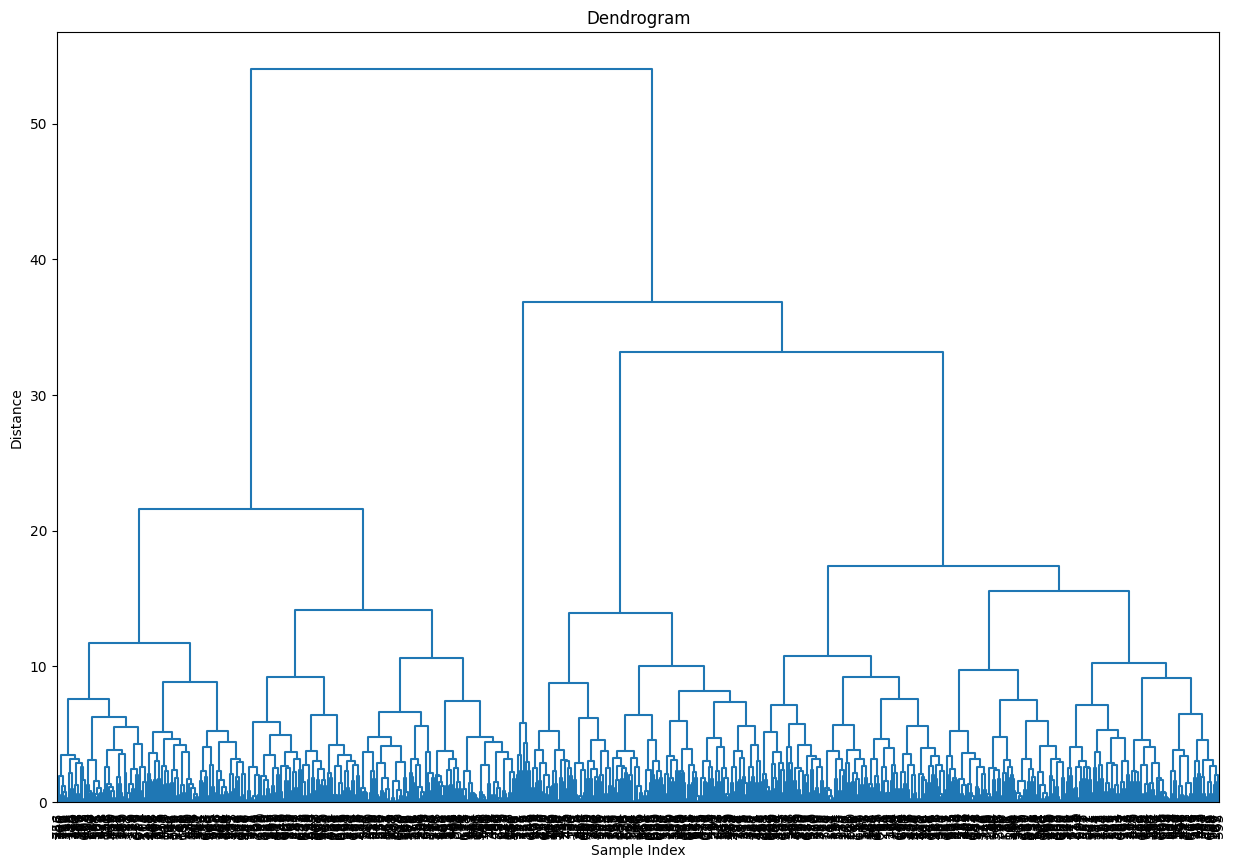

In [17]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
linkage_matrix = linkage(df_processed, metric='euclidean', method='ward')

# Create the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix,
           labels=df.index.tolist(),
           leaf_rotation=90,
           leaf_font_size=10,
           color_threshold=0)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

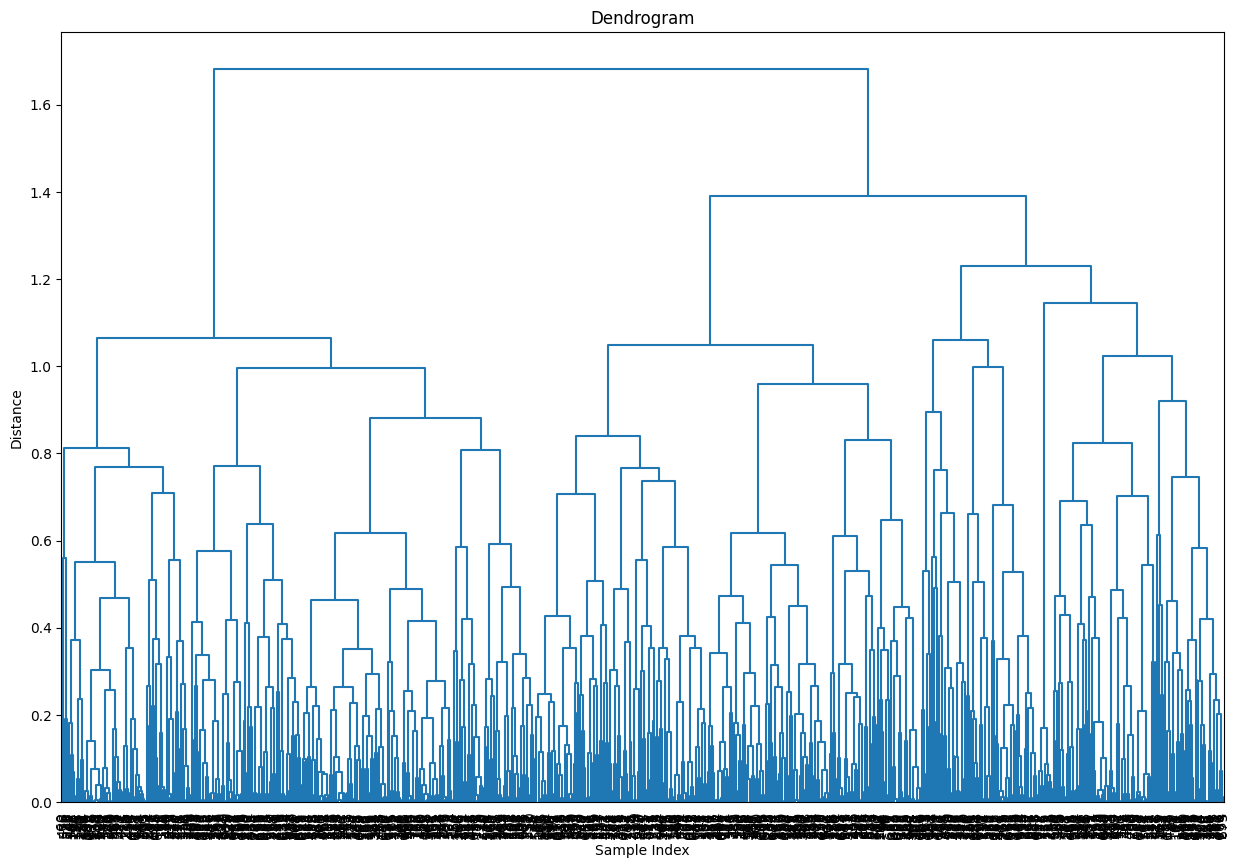

In [18]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
linkage_matrix = linkage(df_processed, metric='cosine', method='complete')

# Create the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix,
           labels=df.index.tolist(),
           leaf_rotation=90,
           leaf_font_size=10,
           color_threshold=0)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

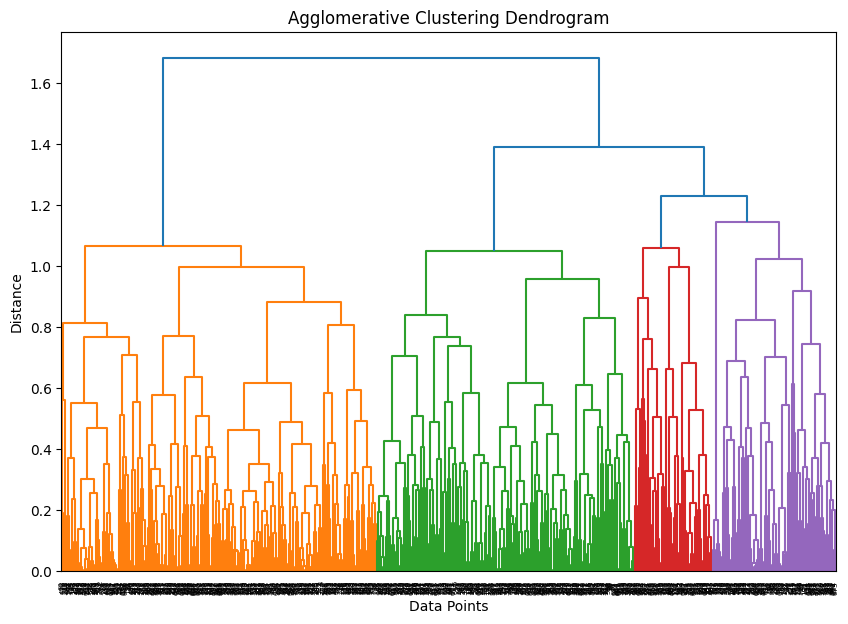

In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# ... (previous code for calculating linkage matrix)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')

# Draw a horizontal line (adjust the y-coordinate as needed)
plt.axhline(y=15, color='r', linestyle='--')

plt.show()

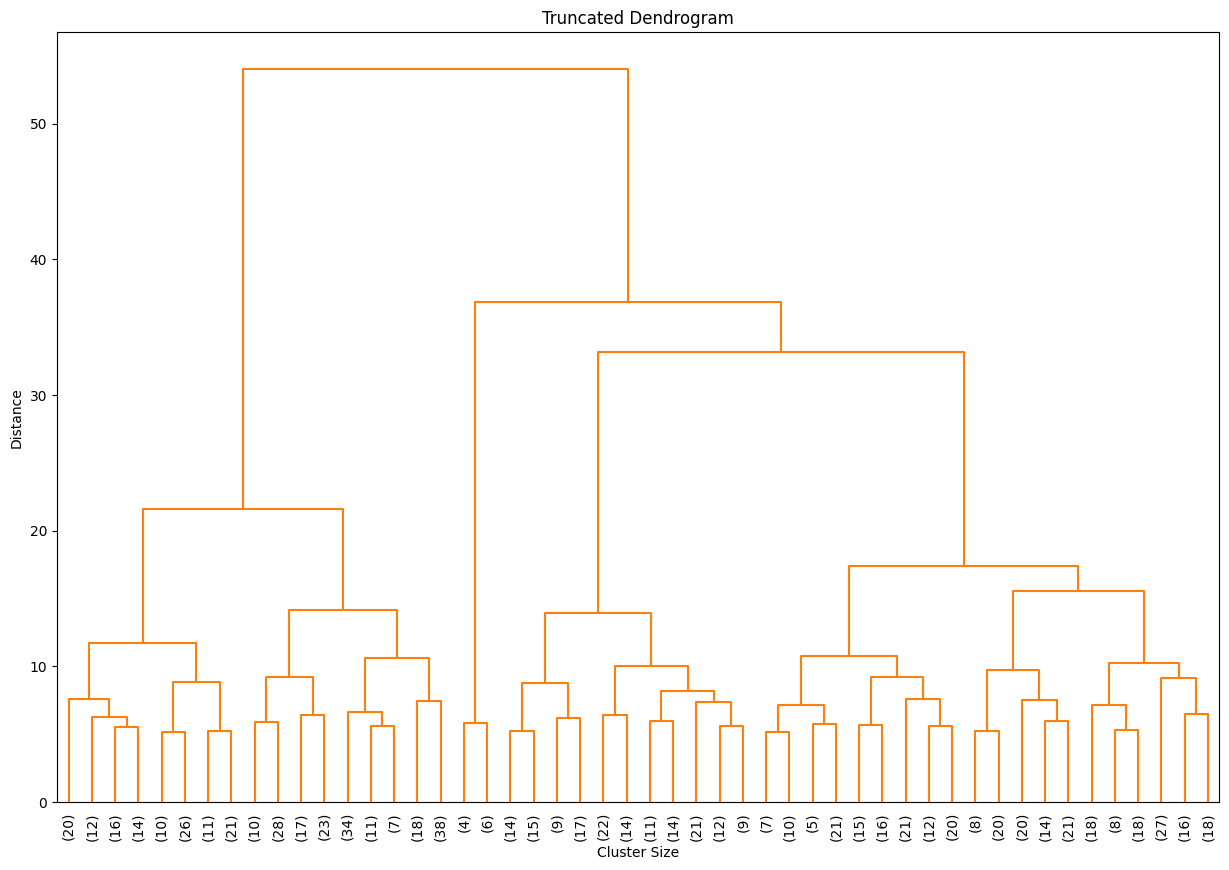

In [15]:
import scipy.cluster.hierarchy as sch

# Compute the linkage matrix
linkage_matrix = linkage(df_processed, method='ward')

# Create the dendrogram with truncated tree
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix,
           truncate_mode='lastp',  # Truncate the tree at the last p merged clusters
           p=50,  # Number of clusters to display (adjust p to the desired number)
           leaf_rotation=90,
           leaf_font_size=10,
           color_threshold=100)
plt.title('Truncated Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


Overall Silhouette Score: 0.88


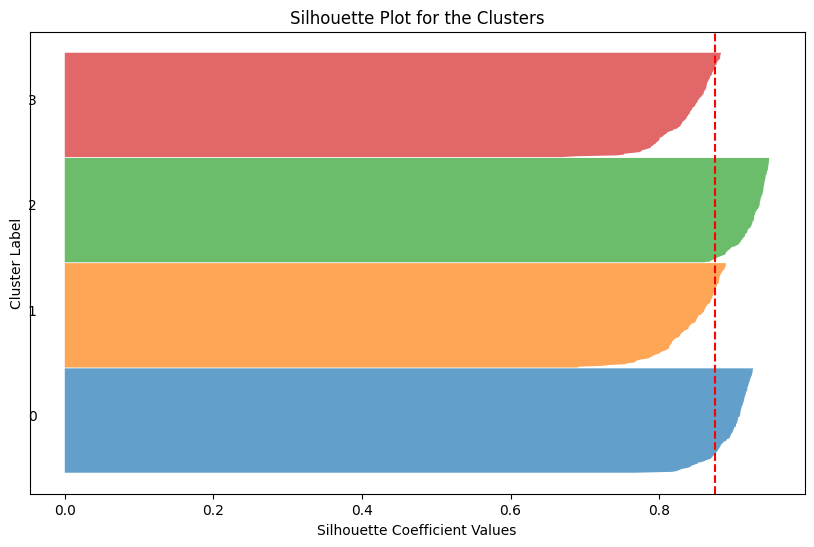

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
df = pd.read_csv('/content/childhealthdata.csv')
df.head()

# Generate synthetic dataset
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# Fit KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Calculate the Silhouette Score for each sample
silhouette_vals = silhouette_samples(X, labels)

# Overall Silhouette Score
sil_score = silhouette_score(X, labels)
print(f'Overall Silhouette Score: {sil_score:.2f}')

# Plot Silhouette Scores for each cluster
y_lower, y_upper = 0, 0
n_clusters = np.unique(labels).shape[0]
plt.figure(figsize=(10, 6))

for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower += len(cluster_silhouette_vals)

plt.axvline(x=sil_score, color="red", linestyle="--")
plt.title("Silhouette Plot for the Clusters")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.yticks([])
plt.show()

A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering.